In [236]:
import pandas as pd
import jscatter
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [237]:
def expectedLife(Fertility):
    return (86.098606 - 4.6620018 * Fertility) 

In [238]:
df = pd.read_excel('Proj1DataMain.xlsx')
df.rename(columns = {'2019 Fertility':'2019_Fertility', '2019 Life Expectancy':'2019_Life_Expectancy'}, inplace = True)
#fertCol = df['Fertility']
#lifeCol = df['2019 Life Expectancy']
df.insert(loc = 3, column ="Predicted_Life_Expectancy", value =0)
df['Predicted_Life_Expectancy'] = df['2019_Fertility'].apply(expectedLife)
df.head()

,Country,2019_Fertility,2019_Life_Expectancy,Predicted_Life_Expectancy
0,Afghanistan,4.3,65.98,66.051998
1,Albania,1.6,78.96,78.639403
2,Algeria,3.0,77.50,72.112601
3,Angola,5.4,62.22,60.923796
4,Antigua and Barbuda,2.0,77.47,76.774602


# Fertility graph skews right

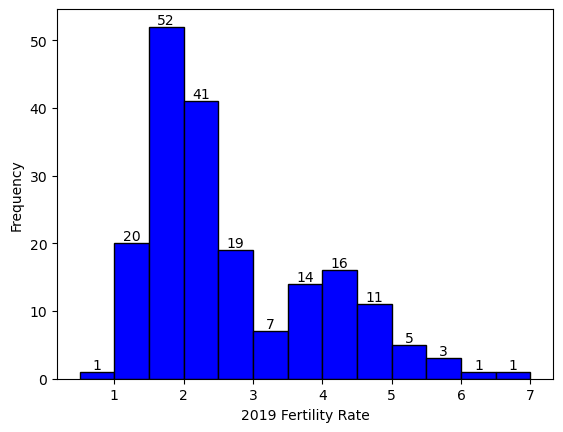

In [239]:
fertBins=[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7]

plt.xlabel('2019 Fertility Rate')
plt.ylabel('Frequency')

# Create the histogram
hist, edges, _ = plt.hist(fertCol, edgecolor='black', bins=fertBins, color = 'blue')

# Label each bin with its frequency
for count, (edge, freq) in enumerate(zip(edges[:-1], hist)):
    plt.text(edge + (edges[count + 1] - edge) / 2, freq, str(int(freq)), ha='center', va='bottom')

plt.show()




# Life expectancy graph skews left

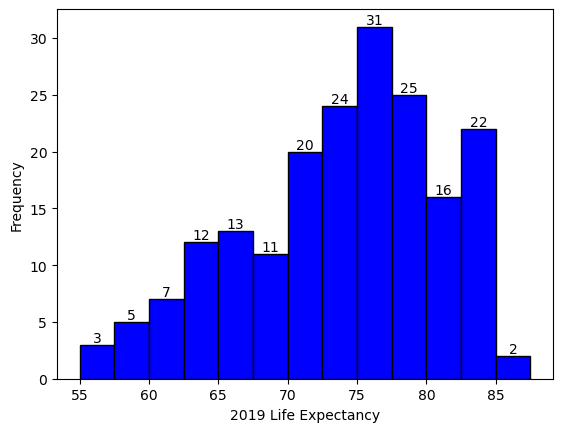

In [240]:
lifeBins=[55, 57.5, 60, 62.5, 65, 67.5, 70, 72.5, 75, 77.5, 80, 82.5, 85, 87.5]

plt.xlabel('2019 Life Expectancy')
plt.ylabel('Frequency')

# Create the histogram
hist, edges, _ = plt.hist(lifeCol, edgecolor='black', bins=lifeBins, color = 'blue')

# Label each bin with its frequency
for count, (edge, freq) in enumerate(zip(edges[:-1], hist)):
    plt.text(edge + (edges[count + 1] - edge) / 2, freq, str(int(freq)), ha='center', va='bottom')

plt.show()

In [241]:
print('Fertility: ')
print(f'mean: {df.iloc[:,1].mean()}')
print(f'variance: {df.iloc[:,1].var()}')
print(f'standard deviation: {df.iloc[:,1].std()}')
print(f'standard deviation: {df.iloc[:,1].median()}')



Fertility: 
mean: 2.6362670157068067
variance: 1.5474940388536778
standard deviation: 1.243983134473164
standard deviation: 2.2


In [242]:
print('Life Expectancy: ')
print(f'mean: {df.iloc[:,2].mean()}')
print(f'variance: {df.iloc[:,2].var()}')
print(f'standard deviation: {df.iloc[:,2].std()}')
print(f'standard deviation: {df.iloc[:,2].median()}')

Life Expectancy: 
mean: 73.80832460732984
variance: 50.68711296775971
standard deviation: 7.11948825181696
standard deviation: 75.01


### In 2019 the average global fertility rates and life expectancy were 2.64 and 73.81, respectively. The variance in fertility rates and life expectancy were 1.54 and 50.69 with a standard deviation of 1.23 and 7.12, respectively. This points to a fairly satisfied life expectancy considering the wide variance. The standard deviation suggests that most of the world fits within a 14 year gap of the average life expectancy. 

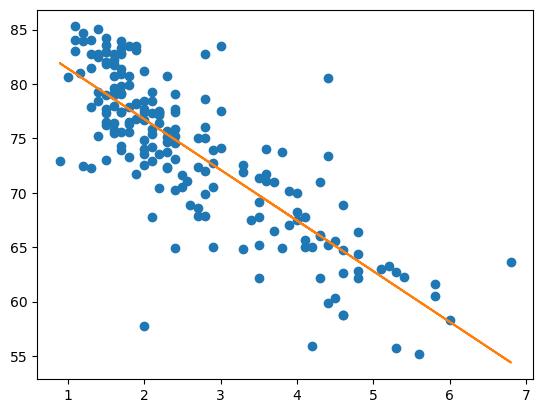

In [243]:
plt.plot(df.iloc[:,1],df.iloc[:,2], 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(df.iloc[:,1],df.iloc[:,2], 1)

#add linear regression line to scatterplot 
plt.plot(df.iloc[:,1], m*df.iloc[:,1]+b)

In [244]:
print('Sample size: ',len(df.iloc[:,1]))
print('Correlation coefficient: ', corr.iloc[:,1][0])
df.iloc[:,1:3].corr()
corr = df.iloc[:,1:3].corr()
print('R-squared: ', corr.iloc[:,1][0]**2)


Sample size:  191
Correlation coefficient:  -0.8145882605505986
R-squared:  0.66355403422685


### The correlation coefficient of -0.81 demonstrates a strong negative linear correlation between fertility rate and life expectancy. That is to say, the higher the birthrate, the lower the life expectancy is on average. We can somewhat predict life expectancy with the formula Life Expectancy = 86.098606 - 4.6620018 x Fertility. The R2 = .6636, meaning that the 66.36% of the variance in life expectancy can be attributed to the fertility rate. This leaves room for other variables like access to healthcare to influence the variance in life expectancy. 

### The fertility and life expectancy of the United States is 1.7 and 79.11, respectively. Given the regression line, we would expect the US to have a life expectancy of 78.18. We calculate this with 86.098606 - 4.6620018 x US Fertility. Given the actual fertility rate of the US, the US has a longer life expectancy than predicted.

### Some other countries that have the same fertility, and therefore the same predicted life expectancy are the UK, Sweden, New Zealand, Ireland, Costa Rica, China, and Brazil. Their actual life expectancy rates are as follows:


In [246]:
df.loc[df['2019_Fertility'] == 1.7].sort_values(by='2019_Life_Expectancy', ascending = False)

,Country,2019_Fertility,2019_Life_Expectancy,Predicted_Life_Expectancy
8,Australia,1.7,83.94,78.173203
161,Sweden,1.7,83.33,78.173203
83,Ireland,1.7,82.81,78.173203
124,New Zealand,1.7,82.80,78.173203
46,Denmark,1.7,81.40,78.173203
40,Costa Rica,1.7,80.94,78.173203
45,Czech Rep.,1.7,79.85,78.173203
54,Estonia,1.7,79.18,78.173203
179,United States,1.7,79.11,78.173203
35,China,1.7,77.47,78.173203


## Countries within ± 0.2 points of the US’s fertility rate are Austria, Brunei, Colombia, France, Russia, and Trinidad and Tobago. Their actual and predicted life expectancies are as follows, respectively:

In [248]:
df.loc[(df['2019_Fertility'] < 2) & (df['2019_Fertility'] > 1.4)].sort_values(by='2019_Life_Expectancy', ascending = False)

,Country,2019_Fertility,2019_Life_Expectancy,Predicted_Life_Expectancy
162,Switzerland,1.5,84.25,79.105603
8,Australia,1.7,83.94,78.173203
33,Channel Islands,1.5,83.60,79.105603
78,Iceland,1.8,83.52,77.707003
92,"Korea, Dem. Rep.",1.9,83.50,77.240803
161,Sweden,1.7,83.33,78.173203
58,France,1.9,83.13,77.240803
30,Canada,1.5,82.96,79.105603
128,Norway,1.5,82.94,79.105603
83,Ireland,1.7,82.81,78.173203


## The Nordic countries, which often have the highest standard of living in the world, are as follow 

In [249]:
df.loc[(df['Country'] == 'Norway') | (df['Country'] == 'Sweden')| (df['Country'] == 'Finland')| (df['Country'] == 'Iceland')| (df['Country'] == 'Denmark')]

,Country,2019_Fertility,2019_Life_Expectancy,Predicted_Life_Expectancy
46,Denmark,1.7,81.40,78.173203
57,Finland,1.4,82.48,79.571803
78,Iceland,1.8,83.52,77.707003
128,Norway,1.5,82.94,79.105603
161,Sweden,1.7,83.33,78.173203
